# IMEC2001 Herramientas Computacionales
## Semana 3: Interpolación y Curva de Bomba
### Clase 5: Ajuste de Datos

Universidad de los Andes — Octubre 23, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Ajuste de Datos (Regresión OLS) [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Mínimos Cuadrados Ordinarios (OLS)
    - 1.2.1. Gráfica MBHP vs Masa
    - 1.2.2. Ajuste Lineal con `numpy`
    - 1.2.3. Ajuste Lineal con `scipy`
    - 1.2.4. Ajuste Lineal con `sklearn`
- 1.3. Caso Práctico
- 1.4. Histogramas
___

<a id="section1"></a>
# Sección 1: Ajuste de Datos (Regresión OLS)

## 1.1. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install numpy
  !pip install sklearn
  ```

In [3]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [5]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

## 1.2. Mínimos Cuadrados Ordinarios (OLS)

Un ajuste (o <font color="#FF5733">regresión</font>) es una función  $f(x)$ que se aproxima a unos datos sin que necesariamente pase sobre ellos (Vidal, 2017). Ahora bien, un ajuste lineal (o <font color="#FF5733">regresión lineal</font>) busca la determinación de la ecuación de la **recta** que mejor ajusta a una distribución bidimensional (i.e., $x$ y $y$) de datos (Franco, 2016).

$$
Y = aX + b
$$

Siendo $Y$ la variable dependiente, $X$ la variable independiente, $a$ la pendiente y $b$ el intercepto con el eje vertical (i.e., eje $Y$).

El método de **mínimos cuadrados ordinarios** (OLS, por sus siglas en inglés) es un ejercicio de optimización del error cuadrático $e^2$. Es decir, se minimiza la suma de cuadrados de las diferencias (llamados residuos) entre los puntos generados por la función y los correspondientes valores en los datos medidos (Wikipedia, 2021).

$$
\sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right )^2
$$

<img src='./img/OLS.png' width='350'/>

Figura tomada de [Cuemath - Least Squares](https://www.cuemath.com/data/least-squares/).

In [6]:
df = pd.read_excel(io='./data/engines.xlsx', 
                   sheet_name='Data')

df.head()

,Index,Engine,Mass (Kg),Number of Cylinders,Strokes per Cycle,Displacement (cm3),Bore (mm),Stroke (mm),Maximum Brake Horsepower (BHP),Revolutions per Minute (RPM)
0,1,Webra Speedy,0.135,1,2,1.8,13.5,12.5,0.45,22000
1,2,Motori Cipolla,0.150,1,2,2.5,15.0,14.0,1.00,26000
2,3,Webra Speed 20,0.250,1,2,3.4,16.5,16.0,0.78,22000
3,4,Webra 40,0.270,1,2,6.5,21.0,19.0,0.96,15500
4,5,Webra 61 Blackhead,0.430,1,2,10.0,24.0,22.0,1.55,14000


### 1.2.1. Gráfica MBHP vs Masa

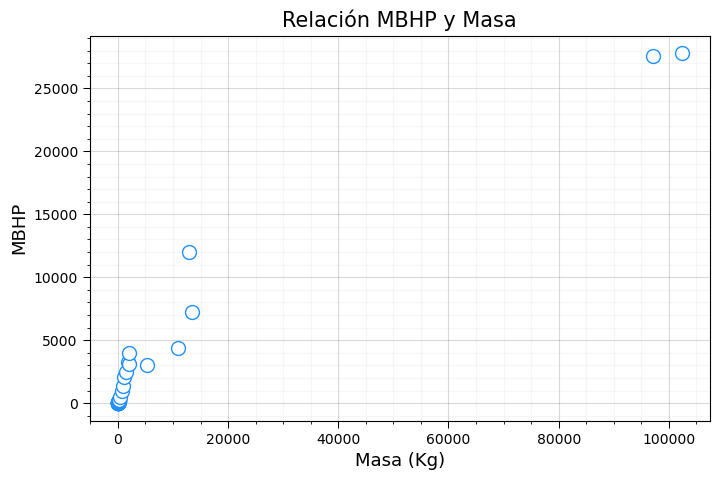

In [7]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

x = df['Mass (Kg)'].values
y = df['Maximum Brake Horsepower (BHP)'].values

plt.plot(x, y, linestyle='', marker='o', markerfacecolor='white', markeredgecolor='dodgerblue', ms=10)

plt.rcParams['axes.axisbelow'] = True

plt.title('Relación MBHP y Masa', fontsize=15)
plt.ylabel('MBHP', fontsize=13)
plt.xlabel('Masa (Kg)', fontsize=13)

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
#plt.legend(loc='best', fontsize=11)
plt.tight_layout;

Al observar la gráfica anterior, se evidencia poca linealidad entre los datos. Por ende, para conseguir una buena interpretación, se procede a obtener la respectiva relación logarítimica, es decir $log \: \text{MBHP}$ vs. $log \: \text{Masa}$.

En este caso (ambos ejes con valores logarítmicos), tenemos que la pendiente $a$ y el intercepto $b$ es:

$$
Y = aX + log(b) 
$$

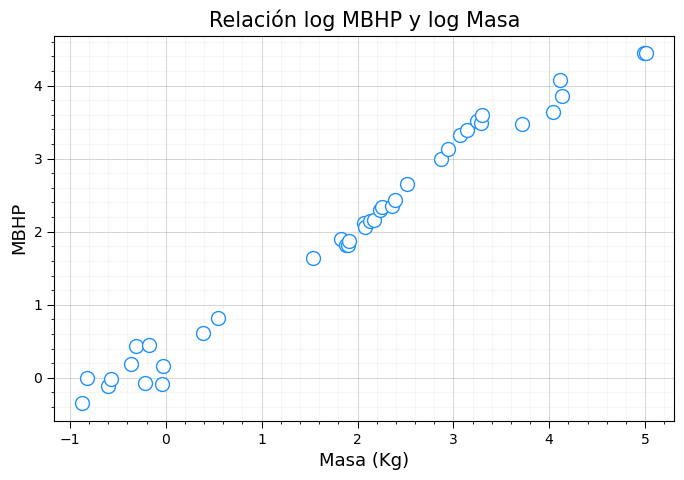

In [8]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

x = np.log10(df['Mass (Kg)'].values)
y = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

plt.plot(x, y, linestyle='', marker='o', markerfacecolor='white', markeredgecolor='dodgerblue', ms=10) #plt.plot

plt.rcParams['axes.axisbelow'] = True

plt.title('Relación log MBHP y log Masa', fontsize=15)
plt.ylabel('MBHP', fontsize=13)
plt.xlabel('Masa (Kg)', fontsize=13)

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
#plt.legend(loc='best', fontsize=11)
plt.tight_layout;

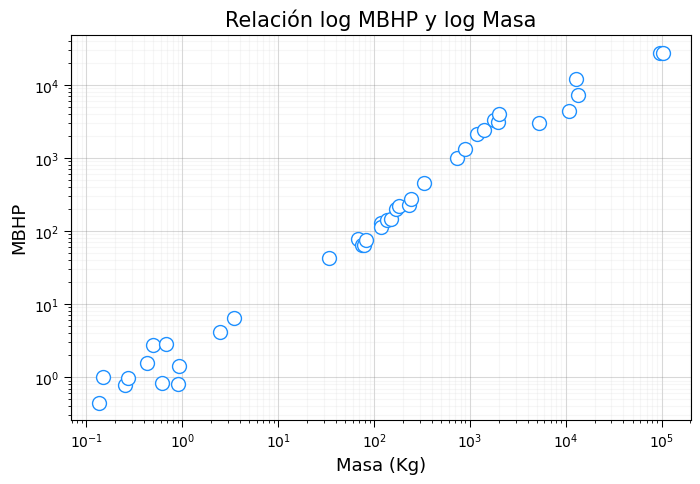

In [9]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

x = df['Mass (Kg)'].values
y = df['Maximum Brake Horsepower (BHP)'].values

plt.loglog(x, y, linestyle='', marker='o', markerfacecolor='white', markeredgecolor='dodgerblue', ms=10) # plt.loglog

plt.rcParams['axes.axisbelow'] = True

plt.title('Relación log MBHP y log Masa', fontsize=15)
plt.ylabel('MBHP', fontsize=13)
plt.xlabel('Masa (Kg)', fontsize=13)

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
#plt.legend(loc='best', fontsize=11)
plt.tight_layout;

¡Perfecto! Con esta transformación, ahora podemos ver que efectivamente hay una relación lineal entre las variables $\texttt{Masa}$ y $\texttt{MBHP}$.

### 1.2.2. Ajuste Lineal con `numpy`

Una función que nos permite realizar un ajuste lineal con el método OLS es `numpy.polyfit`.

La función `numpy.polyfit` permite ajustar un polinomio de grado `n` (en este caso, $n=1$) a un conjunto de puntos $(x, y)$. Esta tiene los siguientes parámetros de entrada principales:

- `x` y `y`: Coordenadas del conjunto.
- `deg`: Grado del polinomio de ajuste.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `numpy.polyfit` dando clic [aquí](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).
</div>

Ahora, la función `numpy.poly1d` es un buen complemento, pues se utiliza para encapsular operaciones típicas en polinomios 1D (e.g., evaluación en nuevas coordenadas o raíces).

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `numpy.poly1d` dando clic [aquí](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html).
</div>

Pero... ¿qué es un modelo lineal (o ecuación lineal)?

<div class="alert alert-block alert-success">
Es una ecuación de primer grado (es decir, involucra una o más variables a la primera potencia) y no contiene productos entre las variables, es decir, la ecuación solo involucra sumas y restas de una variable a la primera potencia.
</div>

In [10]:
# PASO 1. Asignar variables
x_values = np.log10(df['Mass (Kg)'].values)
y_values = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

# PASO 2. Ajuste polinomial (1D) de mínimos cuadrados
coef = np.polyfit(x=x_values, y=y_values, deg=1) # Note el parámetro 'deg'
coef

array([0.85898297, 0.39524968])

In [11]:
# PASO 3. Crear clase polinomio 1D
poly1d_fn = np.poly1d(coef)
print(poly1d_fn)

 
0.859 x + 0.3952


C:\Users\od.salamanca10\AppData\Local\Temp\ipykernel_25560\946628867.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_values,


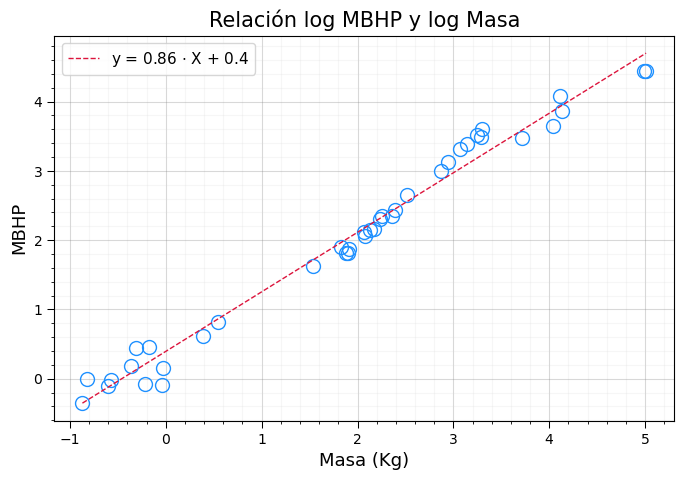

In [12]:
# PASO 4. Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

## 4.1. Gráfica del OLS
plt.plot(x_values,
         poly1d_fn(x_values),
         '--k',
         color='crimson',
         linewidth=1,
         zorder=10,
         label=(f'y = {np.round(coef[0], 2)} $\cdot$ X + {np.round(coef[1], 2)}'))

## 4.2. Gráfica de datos
plt.plot(x_values, y_values, color='dodgerblue', ls='', marker='o', ms=10, fillstyle='none')

## 5.3. Otros parámetros
plt.rcParams['axes.axisbelow'] = True

plt.title('Relación log MBHP y log Masa', fontsize=15)
plt.ylabel('MBHP', fontsize=13)
plt.xlabel('Masa (Kg)', fontsize=13)

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend(loc='best', fontsize=11)
plt.tight_layout;

### 1.2.3. Ajuste Lineal con `scipy`

Similar a `numpy.polyfit`, la función `scipy.stats.linregress` permite realizar la regresión por mínimos cuadrados (i.e., *OLS*) a un conjunto de mediciones. No obstante, **retorna más parámetros estadísticos de interés**.

- `x` y `y`: Coordenadas del conjunto.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.stats.linregress` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).
</div>

In [13]:
# PASO 1. Asignar variables
x_values = np.log10(df['Mass (Kg)'].values)
y_values = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

# PASO 2. Obtener métricas estadísticas con `scipy`
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_values, y_values)

print(slope, intercept, r_value, p_value, std_err)

0.8589829730928723 0.3952496804554848 0.9904155559437717 2.0338504705347278e-33 0.019693439910930113


¿Qué se puede entender del parámetro `r_value`?

$R^2$ es el **coeficiente de correlación** e indica la relación entre los dos conjuntos de mediciones.

<img src='./img/coeficiente_correlacion.png' width='350'/>

Figura tomada de [Viva El Software Libre](https://vivaelsoftwarelibre.com/coeficiente-de-correlacion-en-r/).

### 1.2.4. Ajuste Lineal con `sklearn`

Similar a `numpy.polyfit`, la función `sklearn.linear_model.LinearRegression` únicamente requiere las coordenadas del conjunto (`x` y `y`).

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sklearn.linear_model.LinearRegression` dando clic [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
</div>

In [14]:
from sklearn.linear_model import LinearRegression

# PASO 1. Asignar variables
x_values = np.log10(df['Mass (Kg)'].values)
y_values = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

x_values

array([-0.86966623, -0.82390874, -0.60205999, -0.56863624, -0.36653154,
       -0.30980392, -0.21467016, -0.1739252 , -0.03952922, -0.03151705,
        0.38916608,  0.54406804,  1.53147892,  1.83250891,  1.87506126,
        1.89762709,  1.91381385,  2.07188201,  2.07554696,  2.13033377,
        2.17609126,  2.23299611,  2.26007139,  2.35983548,  2.38916608,
        2.51982799,  2.86628734,  2.94694327,  3.07188201,  3.14612804,
        3.24919836,  3.29225607,  3.30103   ,  3.72098574,  4.03542974,
        4.10924097,  4.13033377,  4.98766626,  5.00987563])

In [15]:
# PASO 2. Reajuste a 2D
x_values = np.array(x_values).reshape(-1,1)
y_values = np.array(y_values).reshape(-1,1)

x_values

array([[-0.86966623],
       [-0.82390874],
       [-0.60205999],
       [-0.56863624],
       [-0.36653154],
       [-0.30980392],
       [-0.21467016],
       [-0.1739252 ],
       [-0.03952922],
       [-0.03151705],
       [ 0.38916608],
       [ 0.54406804],
       [ 1.53147892],
       [ 1.83250891],
       [ 1.87506126],
       [ 1.89762709],
       [ 1.91381385],
       [ 2.07188201],
       [ 2.07554696],
       [ 2.13033377],
       [ 2.17609126],
       [ 2.23299611],
       [ 2.26007139],
       [ 2.35983548],
       [ 2.38916608],
       [ 2.51982799],
       [ 2.86628734],
       [ 2.94694327],
       [ 3.07188201],
       [ 3.14612804],
       [ 3.24919836],
       [ 3.29225607],
       [ 3.30103   ],
       [ 3.72098574],
       [ 4.03542974],
       [ 4.10924097],
       [ 4.13033377],
       [ 4.98766626],
       [ 5.00987563]])

In [16]:
# PASO 3. Obtener métricas estadísticas con `sklearn`
linreg = LinearRegression().fit(x_values, y_values)

print(f'Pendiente: {linreg.coef_}\nIntercepto: {linreg.intercept_}')

Pendiente: [[0.85898297]]
Intercepto: [0.39524968]


## 1.3. Actividad Clase 5: Caso Práctico

<div class="alert alert-block alert-warning">

Queremos obtener el ajuste lineal al correlacionar las variables `Mass (Kg)` y `Displacement (cm3)`. Esta relación también es $log-log$.

El paso a paso que debemos hacer es:
1. Transformar los datos al valor logaritmo.
2. Realizar el ajuste lineal de mínimos cuadrados (OLS).
3. Extraer los valores de *pendiente* e *intercepto*.
4. Estimar el valor de $R^2$.
4. Crear la gráfica base.
5. Agregar la línea de tendencia.

</div>

In [17]:
# PASO 1. Asignar variables
x_values = np.log10(df['Mass (Kg)'].values)
y_values = np.log10(df['Displacement (cm3)'].values)

In [18]:
# PASO 2 y 3. Obtener métricas estadísticas con `scipy`
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_values, y_values)

print(f'Pendiente: {slope}\nIntercepto: {intercept}')

Pendiente: 1.1561457869504963
Intercepto: 1.2458307166223994


In [19]:
# PASO 4. R2
r2 = r_value**2

print(f'R2: {r2}')

R2: 0.9938895519155739


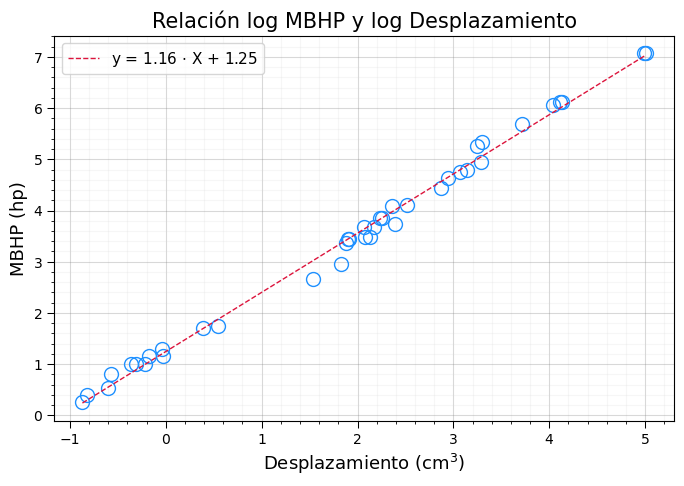

In [20]:
# PASO 5 y 6. Gráficas
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

## 5.1. Gráfica de datos
plt.plot(x_values, y_values, color='dodgerblue', ls='', marker='o', ms=10, fillstyle='none')

## 5.2. Gráfica del OLS
plt.plot(x_values,
         slope*x_values + intercept, 
         linestyle='--',
         color='crimson',
         linewidth=1,
         zorder=10,
         label=(f'y = {np.round(slope, 2)} $\cdot$ X + {np.round(intercept, 2)}'))

## 5.3. Otros parámetros
plt.rcParams['axes.axisbelow'] = True

plt.title('Relación log MBHP y log Desplazamiento', fontsize=15)
plt.ylabel('MBHP (hp)', fontsize=13)
plt.xlabel('Desplazamiento (cm$^3$)', fontsize=13)

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend(loc='best', fontsize=11)
plt.tight_layout;

## 1.4. Histogramas

Los histogramas permiten visualizar la distribución de un conjunto de datos a partir de la frecuencia de los valores representados en un rango específico.

Como lo vimos anteriormente, utilizamos la función `plt.bar`.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `matplotlib.pyplot.hist` dando clic [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
</div>

In [ ]:
# Variables
y = np.log10(df['Maximum Brake Horsepower (BHP)'].values)

mu = np.round(np.mean(y), 1)
sigma = np.round(np.std(y), 1)

# Gráfica
hor = 7
ver = 5
plt.figure(figsize=(hor, ver))

plt.hist(y, bins=20, color='lightgrey', alpha=1) # Note el parámetro bins

plt.axvline(x=mu, color='red', linestyle='--', linewidth=0.75, label=f'Promedio: {mu}') # Promedio
plt.axvline(x=mu+sigma, color='dodgerblue', linestyle='--', linewidth=0.75, label=f'$\mu + \sigma$: {mu+sigma}') # +Desviación
plt.axvline(x=mu-sigma, color='dodgerblue', linestyle='--', linewidth=0.75, label=f'$\mu - \sigma$: {mu-sigma}') # -Desviación

plt.rcParams['axes.axisbelow'] = True

plt.title('Histograma MBHP', fontsize=15);
plt.ylabel('Frecuencia', fontsize=13);
plt.xlabel('Magnitud (hp)', fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=11)
plt.tight_layout;

¿Qué interpretación le damos a este histograma?